# HW 1
# 1.

In [111]:
import numpy as np
import sklearn

def F(x):
    return 1./2.*np.linalg.norm(np.dot(A,x)-y)**2. + lamb*np.linalg.norm(x,ord=np.inf)

def F_prime(x):
    return np.dot(A.T, np.dot(A,x)-y)

def F_subgradient(x):
    return np.dot(A.T, np.dot(A,x)-y) + lamb * np.sign(x)

def F_subgradient_coord(x,coord):
    return np.dot(A[:,coord], np.dot(A,x)-y) + lamb * np.sign(x[coord])

def S(y, beta):
    ret = np.zeros(y.shape)
    for i in range(len(y)):
        if np.abs(y[i]) >= beta:
            ret[i] = y[i] - np.sign(y[i])*beta
    return ret

A = np.random.normal(scale=1,size=(2000,1000))
x_true = np.zeros(1000)
x_true[0:100] = np.random.normal(scale=1,size=100)
z = np.random.normal(scale=.1,size=2000)
y = np.dot(A,x_true) + z
x_0 = np.random.normal(scale=1,size=1000)
step_size_constant = True  # backtrack search otherwise

lamb = 100.


# a) Subgradient Descent

In [130]:
x = np.copy(x_0)
print 'start obj',F(x)

if not step_size_constant:
    step_size = .05
else:
    alpha = .0001

Subgrad_error = []
for count in range(100):
    if not step_size_constant:
        step_size *= 8
        while F(x) < F(x - step_size * F_prime(x)):
            step_size = step_size/2
    else:
        step_size = alpha/(count+1)
    x = x - step_size * F_subgradient(x)
    Subgrad_error.append(F(x))
    
print 'end obj',F(x)
print 'true obj',F(x_true)

from sklearn import linear_model
p= linear_model.LinearRegression(fit_intercept=False).fit(A, y)
print 'sklearn obj',F(p.coef_)

print len(x[np.abs(x)>0])


start obj 1041850.91857
end obj 105918.564758
true obj 254.247817523
sklearn obj 248.916775502
1000


# b) ISTA

In [113]:
x = np.copy(x_0)

print 'start obj',F(x)

if not step_size_constant:
    step_size = .001
else:
    step_size = .0001

steps = []
ISTA_error = []
for count in range(100):
    if not step_size_constant:
        step_size *= 8
        while F(x) < F(S(x - step_size*F_prime(x), step_size*lamb)):
            step_size = step_size/2
        steps.append(step_size)
    x = S(x - step_size*F_prime(x), step_size*lamb)
    ISTA_error.append(F(x))

# print steps
# print np.average(steps)
print 'end obj',F(x)
print 'true obj',F(x_true)

from sklearn import linear_model
p = linear_model.LinearRegression(fit_intercept=False).fit(A, y)
print 'sklearn obj',F(p.coef_)

print len(x[np.abs(x)>0])


start obj 1041850.91857
end obj 493.263723588
true obj 254.247817523
sklearn obj 248.916775502
98


# c) FISTA

In [114]:
x = np.copy(x_0)
z = x
print 'start obj',F(x)

if not step_size_constant:
    step_size = .001
else:
    step_size = .0001

steps = []
FISTA_error = []
for count in range(100):
    if not step_size_constant:
        step_size *= 8
        while F(x) < F(S(z - step_size*F_prime(z), step_size*lamb)):
            step_size = step_size/2
        steps.append(step_size)
    x_old = x
    x = S(z - step_size*F_prime(z), step_size*lamb)
    z = x + count/(count+3)*(x - x_old)
    FISTA_error.append(F(x))

# print steps
# print np.average(steps)
print 'end obj',F(x)
print 'true obj',F(x_true)

from sklearn import linear_model
p = linear_model.LinearRegression(fit_intercept=False).fit(A, y)
print 'sklearn obj',F(p.coef_)

print len(x[np.abs(x)>0])


start obj 1041850.91857
end obj 493.263723588
true obj 254.247817523
sklearn obj 248.916775502
98


# d) Coordinate Descent

In [115]:
x = np.copy(x_0)
z = x
print 'start obj',F(x)

if not step_size_constant:
    step_size = .01
else:
    step_size = .0001

steps = []
Coord_error = []
for count in range(100):
    for coord in range(len(x)):
        if not step_size_constant:
            step_size *= 8
            x_temp = np.copy(x)
            x_temp[coord] = x[coord] - step_size * np.dot(A[:,coord], np.dot(A,x)-y)
            while F(x) < F(x_temp):
                step_size = step_size/2
                x_temp[coord] = x[coord] - step_size * np.dot(A[:,coord], np.dot(A,x)-y)
            steps.append(step_size)
            
            x[coord] = x[coord] - step_size * np.dot(A[:,coord], np.dot(A,x)-y)
            
        else:
            x[coord] = x[coord] - step_size * F_subgradient_coord(x,coord)
            
#         print F(x)
    Coord_error.append(F(x))

# print np.average(steps)
print 'end obj',F(x)
print 'true obj',F(x_true)

from sklearn import linear_model
p = linear_model.LinearRegression(fit_intercept=False).fit(A, y)
print 'sklearn obj',F(p.coef_)

print len(x[np.abs(x)>0])


start obj 1041850.91857
end obj 520.647478439
true obj 254.247817523
sklearn obj 248.916775502
1000


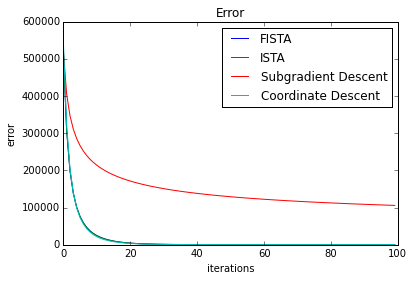

In [132]:
%matplotlib inline
import matplotlib.pyplot as plt

fista, = plt.plot(range(100), FISTA_error)
ista, = plt.plot(range(100), ISTA_error)
subgrad, = plt.plot(range(100), Subgrad_error)
coord, = plt.plot(range(100), Coord_error)

plt.legend([fista, ista, subgrad, coord], ["FISTA", "ISTA", "Subgradient Descent", "Coordinate Descent"])

plt.title('Error')
plt.xlabel('iterations')
plt.ylabel('error')


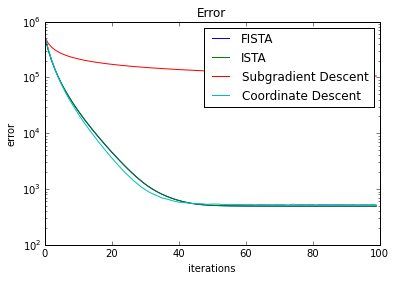

In [133]:
%matplotlib inline
import matplotlib.pyplot  as pyplot

ax = plt.subplot(1, 1, 1)
ax.set_yscale('log')

fista, = plt.plot(range(100), FISTA_error)
ista, = plt.plot(range(100), ISTA_error)
subgrad, = plt.plot(range(100), Subgrad_error)
coord, = plt.plot(range(100), Coord_error)

plt.legend([fista, ista, subgrad, coord], ["FISTA", "ISTA", "Subgradient Descent", "Coordinate Descent"])

plt.title('Error')
plt.xlabel('iterations')
plt.ylabel('error')


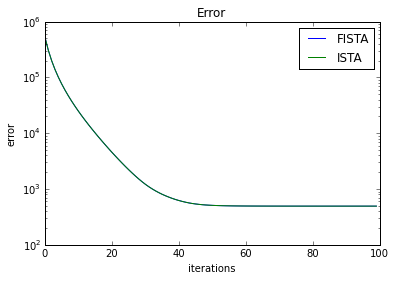

In [134]:
%matplotlib inline
import matplotlib.pyplot  as pyplot

ax = plt.subplot(1, 1, 1)
ax.set_yscale('log')

fista, = plt.plot(range(100), FISTA_error)
ista, = plt.plot(range(100), ISTA_error)

plt.legend([fista, ista], ["FISTA", "ISTA"])

plt.title('Error')
plt.xlabel('iterations')
plt.ylabel('error')


Comments: We see the ISTA and FISTA methods have a very similiar convergence rates. The subgradient method converges very slow with $\frac{\alpha}{k}$ step sizes. The coordinate method converges similar to ISTA/FISTA but takes more computation.